In [1]:
import pandas as pd
import seaborn as sns
import nasdaqdatalink
import matplotlib.pyplot as plt
sns.set()
sns.set_context('talk')
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
nasdaqdatalink.ApiConfig.api_key = 'cMz6rH7NcNQz4NJeT4c6'
ticker_dict = {'',
               'AAA': 'ML/AAAEY',
               'A': 'ML/AEY',
               'AA': 'ML/AAY',
               'BBB': 'ML/BBBEY',
               'BB': 'ML/BBY',
               'B': 'ML/BEY',
               'CCC': 'ML/CCCY'}

In [3]:
tickers = [value for _, value in ticker_dict.items()]
data = nasdaqdatalink.get(tickers)
data.columns = [key for key, _ in ticker_dict.items()]

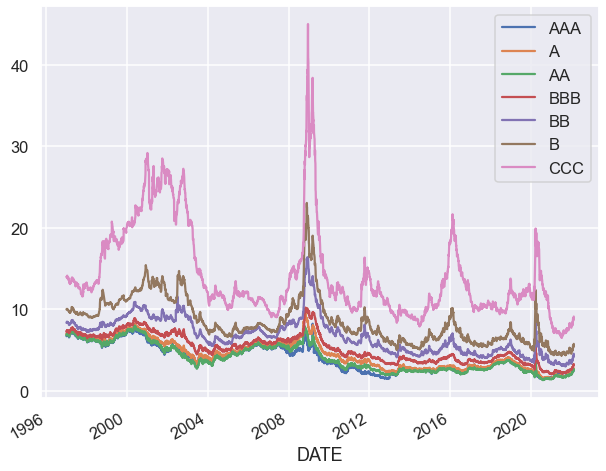

In [4]:
_ = data.plot()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6557 entries, 1996-12-31 to 2022-02-11
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAA     6557 non-null   float64
 1   A       6557 non-null   float64
 2   AA      6557 non-null   float64
 3   BBB     6557 non-null   float64
 4   BB      6557 non-null   float64
 5   B       6557 non-null   float64
 6   CCC     6557 non-null   float64
dtypes: float64(7)
memory usage: 667.9 KB


In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA()
pca.fit(data)

PCA()

Text(0.5, 1.0, 'Cumulative Explained Variance')

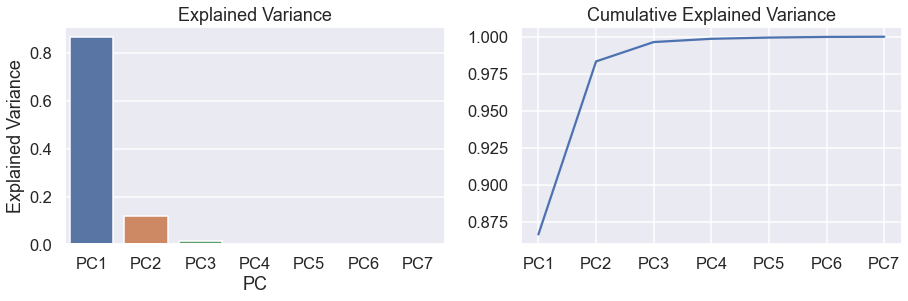

In [8]:
df = pd.DataFrame().from_dict({'PC': [f"PC{i+1}" for i, _ in enumerate(pca.explained_variance_ratio_)], 
                               'Explained Variance': pca.explained_variance_ratio_})
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(x='PC', y='Explained Variance', data = df, ax = ax[0])
ax[1].plot(df['PC'], df['Explained Variance'].cumsum())
ax[0].set_title('Explained Variance')
ax[1].set_title('Cumulative Explained Variance')

In [9]:
n_components = 3
pca = PCA(n_components)
projected = pca.fit_transform(data)
df_proj = pd.DataFrame(projected)
df_proj.columns = [f'PC{i+1}' for i in range(n_components)]
df_proj.index = data.index

<AxesSubplot:xlabel='DATE'>

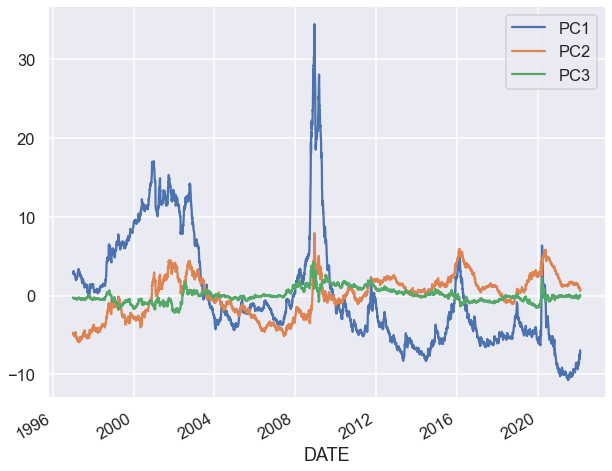

In [10]:
df_proj.plot()